In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## z-scores for SNV density and singleton density, and vista-enhancer counts, for noncoding trustworthy windows

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I used the following script to compute the z-scores of windows that are "common" to Chen et al and McHale et al: 

```
experiments/germline-model/chen-et-al-2022/compute-overlapping-zscores.sh
```

I used 

```
download-process-data/vista-enhancers/download.sh
```

to download vista enhancers, and then used https://genome.ucsc.edu/cgi-bin/hgLiftOver to translate the coordinates of the enhancers from `hg19` to `hg38`. 

I used the following script to compute the number of vista enhancers that overlap each Chen et al window:

```
experiments/germline-model/chen-et-al-2022/add-vista-enhancer-counts.sh
```


In [3]:
import pandas as pd 

def get_chen_mchale_vista_enhancers():    
    CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.vista-enhancers.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

chen_mchale_zscores_vista_enhancers = get_chen_mchale_vista_enhancers()

chen_mchale_zscores_vista_enhancers['mchale_K_bar'] = pd.to_numeric(chen_mchale_zscores_vista_enhancers['mchale_K_bar'], errors='coerce')
chen_mchale_zscores_vista_enhancers = chen_mchale_zscores_vista_enhancers.dropna()
chen_mchale_zscores_vista_enhancers.describe()

,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_vista_enhancer_count
count,2.576570e+05,2.576570e+05,257657.000000,2.576570e+05,2.576570e+05,2.576570e+05,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000
mean,8.211134e+07,8.211234e+07,-0.626094,8.211133e+07,8.211233e+07,8.211183e+07,-0.123734,200.369856,0.014211,106.131151,200.362257,950.818324,0.002282
std,5.472855e+07,5.472855e+07,2.083320,5.472855e+07,5.472855e+07,5.472855e+07,2.210617,30.452046,0.982519,16.225943,30.449610,28.926395,0.048122
min,5.220000e+05,5.230000e+05,-9.994907,5.220890e+05,5.230900e+05,5.225890e+05,-9.121771,128.000000,-4.776766,53.000000,128.000000,901.000000,0.000000
25%,3.723900e+07,3.724000e+07,-1.765699,3.723909e+07,3.724009e+07,3.723959e+07,-1.546801,181.000000,-0.639530,95.000000,181.000000,926.000000,0.000000
50%,7.400700e+07,7.400800e+07,-0.487689,7.400709e+07,7.400809e+07,7.400759e+07,-0.447569,196.000000,0.028681,104.000000,196.000000,951.000000,0.000000
75%,1.163670e+08,1.163680e+08,0.696284,1.163669e+08,1.163679e+08,1.163674e+08,0.852049,214.000000,0.687698,115.000000,214.000000,976.000000,0.000000
max,2.483380e+08,2.483390e+08,9.924837,2.483380e+08,2.483390e+08,2.483385e+08,18.372572,431.000000,4.560088,234.000000,431.000000,1000.000000,2.000000


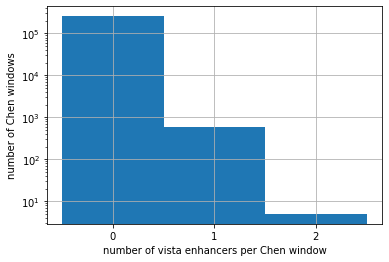

In [4]:
import numpy as np 

axis = chen_mchale_zscores_vista_enhancers['chen_vista_enhancer_count'].hist(bins=np.arange(-0.5, 3.5, 1))
axis.set_yscale('log')
axis.set_xlabel('number of vista enhancers per Chen window')
axis.set_ylabel('number of Chen windows')
_ = axis.set_xticks(np.arange(0, 3, step=1))

In [5]:
chen_mchale_zscores_vista_enhancers['chen_at_least_one_vista_enhancer'] = chen_mchale_zscores_vista_enhancers['chen_vista_enhancer_count'] > 0
chen_mchale_zscores_vista_enhancers

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps,chen_vista_enhancer_count,chen_at_least_one_vista_enhancer
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.170831,146,296,915,0,False
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.159818,132,264,941,0,False
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.427748,152,319,942,0,False
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.721886,141,301,997,0,False
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.322700,119,263,921,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257883,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.161295,107,225,916,0,False
257884,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359,112,237,930,0,False
257885,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.703156,105,233,931,0,False
257886,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.072424,120,229,932,0,False


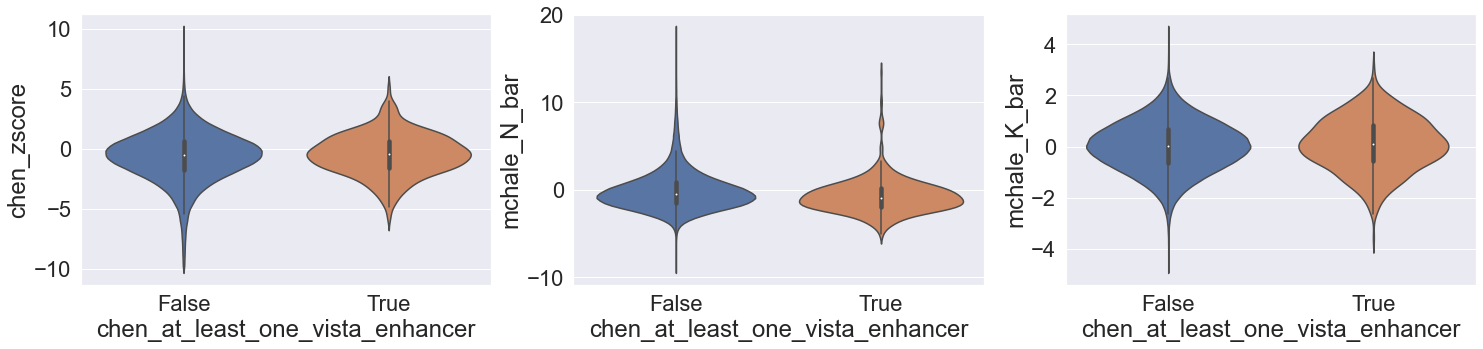

In [6]:
# the fact the two distributions in the following violin plots are largely overlapping
# suggests that a classifier built using any of these z-scores will have low precision and recall 

import seaborn as sns
sns.set(font_scale = 2)

import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i, y in enumerate(['chen_zscore', 'mchale_N_bar', 'mchale_K_bar']):
    sns.violinplot(
        data=chen_mchale_zscores_vista_enhancers, 
        y=y, 
        x="chen_at_least_one_vista_enhancer",
        ax=axs[i]
    )

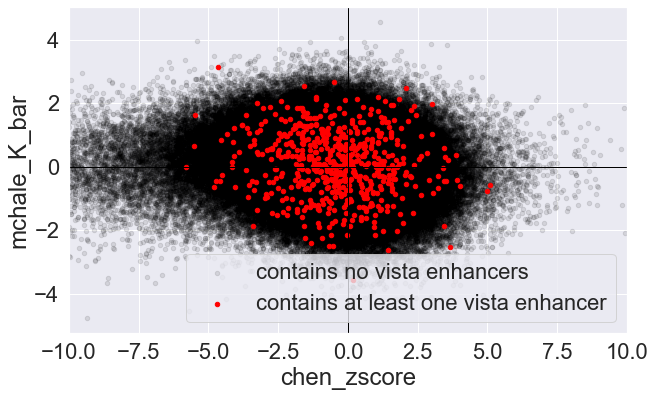

In [7]:
def scatter_plot(step_size=1): 
    df = chen_mchale_zscores_vista_enhancers.iloc[::step_size, :]
        
    df_false = df[
        df['chen_at_least_one_vista_enhancer'] == False
    ]
    df_true = df[
        df['chen_at_least_one_vista_enhancer'] == True
    ]
    
    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))

    axis = df_false.plot.scatter(
        x = 'chen_zscore',
        y = 'mchale_K_bar',
        c = 'black',
        alpha = 0.1,
        ax = axis,
        label = 'contains no vista enhancers'
    )

    axis = df_true.plot.scatter(
        x = 'chen_zscore',
        y = 'mchale_K_bar',
        c = 'red',
        alpha = 1,
        ax = axis,
        label = 'contains at least one vista enhancer'        
    )

    axis.set_xlim(-10, 10)
#     axis.set_ylim(-10, 10)
    plt.legend()
    
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')

# the fact that the two joint distributions in the following plot are largely overlapping, 
# suggests a classifer that uses both zscores will have low precision and recall 
scatter_plot(step_size=1)

In [8]:
def compute_bins(number_bins, z_min=-5, z_max=5): 
    bin_width = (z_max - z_min)/number_bins
    bins = np.arange(z_min, z_max+0.5*bin_width, bin_width)
    return bins
    
def aggregate_2d(grouped_windows, x, y, z, aggregation_function): 
    aggregated = grouped_windows.agg({z["column"]: [aggregation_function]})
    aggregated.columns = [f'{z["column"]}_{aggregation_function}']
    aggregated = aggregated.reset_index()
    
    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    aggregated = aggregated.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values=f'{z["column"]}_{aggregation_function}')
    
    return aggregated
    
def plot_heat_map(df, x, y, z, count_threshold, ax, heat_map_type): 
    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{x["column"]}_bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
    df[f'{y["column"]}_bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))

    grouped_windows = df.groupby([f'{x["column"]}_bin', f'{y["column"]}_bin'])
    
    sample_mean = aggregate_2d(grouped_windows, x, y, z, 'mean')
    sample_std = aggregate_2d(grouped_windows, x, y, z, 'std')
    
    sample_size = pd.DataFrame(grouped_windows.size())
    sample_size.columns = ['counts']
    sample_size = sample_size.reset_index()

    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    sample_size = sample_size.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values='counts')
    
    # https://en.wikipedia.org/wiki/Standard_error
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html
    standard_error_of_mean = sample_std / np.sqrt(sample_size)
    
    mask = sample_size < count_threshold

    if heat_map_type == 'vista_enhancer_enrichment':
        heat_map = sample_mean 
        heat_map_colorbar_label = z['vista_enhancer_enrichment_label']
    elif heat_map_type == 'vista_enhancer_enrichment_fractional_error': 
        heat_map = standard_error_of_mean/sample_mean
        heat_map_colorbar_label = z['fractional_error_label']
    else:
        raise ValueError
        
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    sns.heatmap(
        heat_map, 
        cmap = 'BrBG', 
        center = None, 
        annot = True, 
        fmt = '.5f', 
        linewidths = .5, 
        cbar_kws = {'label': heat_map_colorbar_label},
        ax = ax,
        mask = mask
    )
    ax.invert_yaxis()
       
def plot_heat_maps(x_number_of_bins, y_number_of_bins, y_column):
    # sns.set(rc = {'figure.figsize': (10, 8)})
    sns.set(font_scale = 1)

    with sns.axes_style("white"):        
        fig, axs = plt.subplots(1, 2, figsize=(25,5))
        for i, heat_map_type in enumerate(['vista_enhancer_enrichment', 'vista_enhancer_enrichment_fractional_error']):
            plot_heat_map(
                df = chen_mchale_zscores_vista_enhancers,
                x = {
                    'column': 'chen_zscore',
                    'number_of_bins': x_number_of_bins
                },
                y = { 
                    'column': y_column,
                    'number_of_bins': y_number_of_bins
                },
                z = {
                    'column': 'chen_at_least_one_vista_enhancer',
                    'vista_enhancer_enrichment_label': 'fraction of Chen windows that have at least one vista enhancer',
                    'fractional_error_label': 'fractional error of vista-enhancer enrichment'
                },
                count_threshold = 2e4,
                ax = axs[i],
                heat_map_type = heat_map_type,
            )

## There aren't enough data to know whether Chen's z-score explains more of the variance in vista_enhancer fraction than McHale's N_bar 


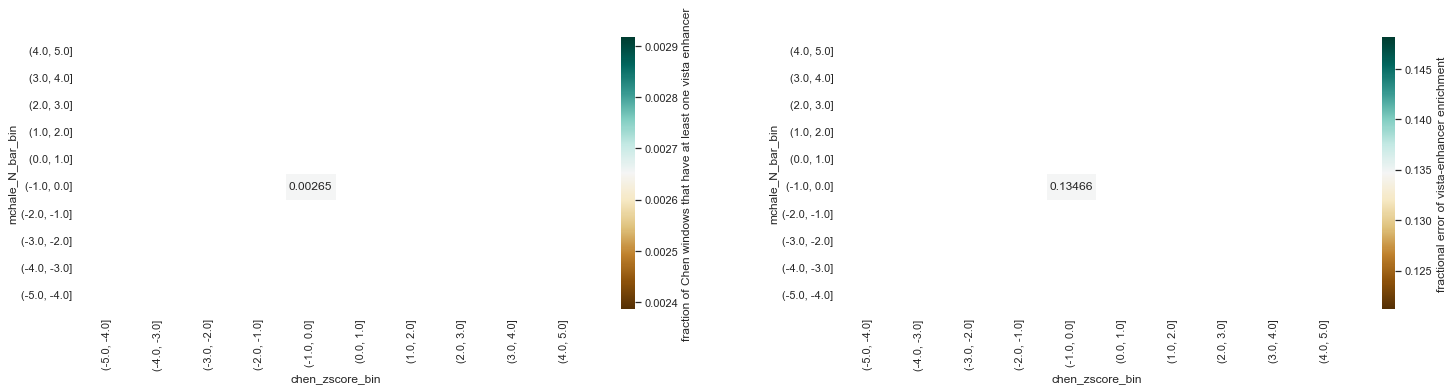

In [9]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_N_bar'
)

## There aren't enough data to know whether McHale's K_bar in conjunction with Chen's z-score explains more of the variance in vista-enhancer fraction than Chen's z-score can by itself 


/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


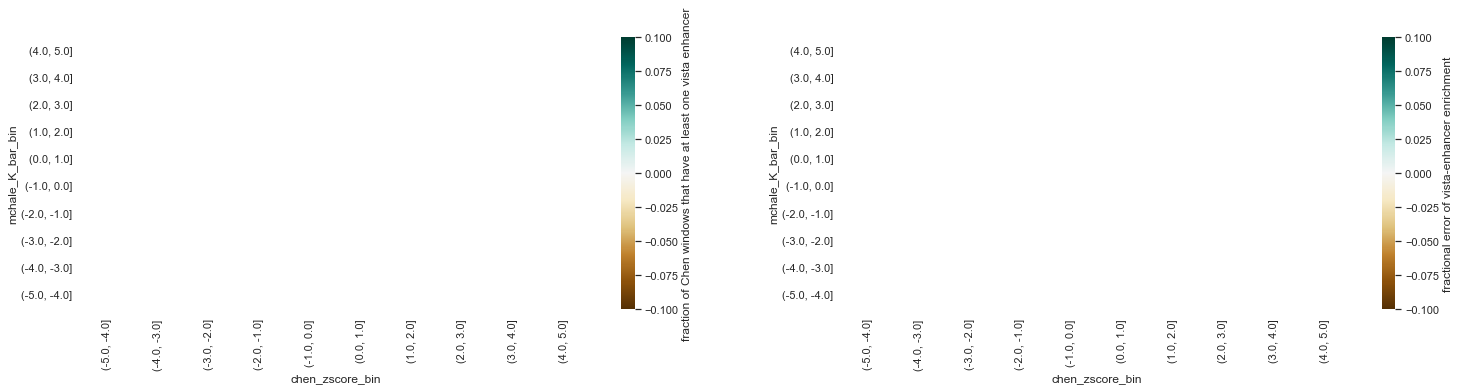

In [10]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_K_bar'
)

## Training Gaussian Naive-Bayes models on the data would not result in a reliable model anyway because the positive class is too rare 




In [11]:
# size of positive class: 
chen_mchale_zscores_vista_enhancers['chen_at_least_one_vista_enhancer'].sum()

583

When the positive class is as rare as this, simulations show that one cannot reliably recover the data generating process: https://gist.github.com/petermchale/0aa9b944edb0bb18e4701044dd915d66